# Midterm IS2002B. Student ID: xxxxxx
## General comments 
This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the last 6 Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. You or not allowed to share documents, or communicate in any other way with people inside or outside the class room during the midterm. To finish the midterm in the alloted 1hr and 50 min, you will have to work fast and efficiently. Good luck!
## Preliminaries
Sets up the environment by importing pandas, numpy, and matplotlib. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). 

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
import pandas as pd 
import numpy as np
import seaborn as sb

## Data set 
The data set for the midterm is a *random* sample of 3000 professional male soccer players employed by professional European club in 2019. We are interested in what factors may influence the overall ability of each player - i.e. their effective performance on the field. 

The data frame contains the data fields
- age:   		    Age of the play in years.
- overall:			Overall ability of the player (composite score 1-100). Higher numbers indicate better players.
- weak_foot: 	    Player has weak/strong foot: 1: nearly symetric - 5: strong preference for one foot  
- preferred_foot:  	Player prefers Left/Right foot   
- skill_moves: 	    Results of the acrobatic skills assessment 1: worst - 5: best  

You can ignore all other variables

## Task 1: Preferred foot and foot asymmetry (37pt)
In this task you will explore the connection between the preferred foot (left / right) and the degree to which the player prefers this foot over the weaker one (weak_foot). 

### Question 1.1 (7pt)
Generate and display a table that shows the __proportion__ of players for each weak-foot rating (1-5) seperately for players that prefer the left and right foot.  Make a stacked bar plot that shows the proportions of weak-foot ratings (1-5) separately for left and rght footed players. Don't forget the figure caption. Written answer: Based on these relative proportion, do you think that left- or right footed players are more asymmetric, i.e. have a stronger preference for their dominant foot over the weaker one?  

In [2]:
D = pd.read_csv('footballer.csv')
D.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'skill_moves', 'weak_foot',
       'preferred_foot', 'crossing', 'finishing'],
      dtype='object')

In [3]:
# Crosstab done correctly 2  (0 if done the other way around)
T = pd.crosstab(D["preferred_foot"],D["weak_foot"],normalize='index')
T

weak_foot,1,2,3,4,5
preferred_foot,,,,,
Left,0.004043,0.246631,0.645553,0.097035,0.006739
Right,0.007086,0.192648,0.627989,0.158105,0.014172


Text(0, 0.5, 'proportion')

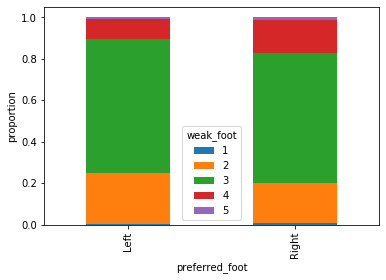

In [4]:
# 1 point for figure 1 point for correct caption
T.plot(kind='bar',stacked=True)
plt.ylabel('proportion')

*Figure 1*. Stacked bar plot of rating proportions (1: weak preference, 5: strong preference) split by foot preference.  

>The proportion of left-footed players that have a weak preference seems to be higher. Therefore, right-footed players tend to be more asymmetric. (3pts)

### Question 1.2 (7pt)
Make a table that shows the __absolute__ counts of left- and right- footed players that have a specific level of having a weak foot. From these numbers, calculate and report the probability that 
* a player is left-footed: p(preferred_foot = Left)
* a player is a nearly symmetric: p(weak_foot = 1)
* a player has a foot preference of 4, given he is right-footed: p(weak_foot = 4 | preferred_foot = Right)
* a player is left-footed, given that he is extremely asymmetric: p(preferred_foot = Left | weak_foot=5)

In [4]:
# 3 for table 1 per probability
T=pd.crosstab(D.preferred_foot,D.weak_foot,margins=True)
T 

weak_foot,1,2,3,4,5,All
preferred_foot,,,,,,
Left,3,183,479,72,5,742
Right,16,435,1418,357,32,2258
All,19,618,1897,429,37,3000


In [18]:
print(f"p(preferred_foot = Left) {T.loc['Left','All']/T.loc['All','All']:0.3f}")
print(f"p(weak = 1) {T.loc['All',1]/T.loc['All','All']:0.3f}")
print(f"p(weak_foot = 4 | preferred_foot = Right) {T.loc['Right',4]/T.loc['Right','All']:0.3f}")
print(f"p(preferred_foot = Left | weak_foot=5) {T.loc['Left',5]/T.loc['All',5]:0.3f}")


p(preferred_foot = Left) 0.247
p(weak = 1) 0.006
p(weak_foot = 4 | preferred_foot = Right) 0.158
p(preferred_foot = Left | weak_foot=5) 0.135


### Question 1.3: (5pt)
What measurement scale does the variable *weak_foot* have? Based on your answer, would you rather summarize the data by reporting mean and standard deviation, or by reporting the counts in the 5 answer categories?   

>Measurement scale can be ordinal or *maybe* interval (3pt). 
> Other options are wrong. 

>* Ordinal -> report counts (2 pt)
>* Interval -> mean and SD  (2 pt)

### Question 1.4 (5pt)
We want to test whether left- and right footed players show **any** difference in their distribution of weak_foot ratings across the 5 categories. 
Please formulate the Alternative and Null hypothesis. What test statistics would be appropriate to use?   

>Alternative Hypothesis: The answer on the weak_foot rating scale differs between left- and right-footed players (1pts)

>Null Hypothesis: The answer on the weak_foot rating scale is independent of the preferred foot. (2pts)

>The Null-hypothesis can be tested using the Chi-square test. (2pts)

### Question 1.5 (13pt)
Perform a randomization test to test whether you can reject the Null-hypothesis formulated in Question 1.4. Your code should produce a figure that shows the distribution of chosen test statistics under the Null hypothesis, as well as the empirical value as a vertical line.  Remember to provide axis lables and a caption. Written answer: Report the value of the statistics and the associated p-value, using at least 1000 iterations. What do you conclude regarding the hypotheses formulated above? 

In [6]:
def calcX2(df):
    table = pd.crosstab(df['weak_foot'], df['preferred_foot'], margins = True)
    
    ## calculate the expected values under the null hypothesis that the director gender is independent of the movie genre
    (r, c) = table.shape
    expected = np.zeros((r-1, c-1))
    for i in range(r-1):
        for j in range(c-1):
            expected[i, j] =  (table.iloc[i].iloc[-1] * table.iloc[-1].iloc[j])/table['All']['All']
            
    ## converting the contingency table to a numpy array to be used in element-wise calculation of the X2
    observed = np.array(pd.crosstab(df['weak_foot'], df['preferred_foot']))
    
    X2 = sum(sum(((observed - expected)**2)/expected))
    
    return X2


def performRandomization(df,fcn,shuffle,numIterations=500,sides=1, nbins = 10):    
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data 
        S=df.copy()                    # Make copy of the data frame
        x = np.array(range(len(df.index))) # Make copy of the data frame
        np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself! 
        y = S[shuffle].iloc[x]   # copy the newly reorded values into a new Series  
        y = y.reset_index(drop=True)   #reoder the indices 
        S[shuffle]=y           # Copy back into the data frame
        
        #2. Calculate test statistics 
        listOfTS[i] = fcn(S)

    # 3. Caluclate the real test statistic 
    realTS = fcn(df)

    # 4. Plot a histogram of the 
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')
    
    # 5. determine p-value (one sided)
    if sides==1: 
        p=sum(listOfTS>=realTS)/len(listOfTS)
    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=realTS)/len(listOfTS)
    print(' P-value of the randomisation test is p= ',p)
    return p

 P-value of the randomisation test is p=  0.0


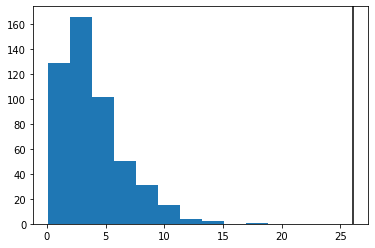

In [7]:
P = performRandomization(D,calcX2,'preferred_foot',numIterations=500,sides=1, nbins = 10)

*Figure 2*. Histogram showing the distribution of test statistic under the null hypothesis. p-values corresponding to a two-sided test are shown as vertical lines.

> Based on the permuation test, ....

3 pts for test stats function
3 pts for randomization 
3 pts for figure +1 pt for caption 
3 for p-value and decision 

## TASK 2: Age and player ability (28pt)
In this part of the task, we will look at the relationship between the age of the player and the overall ability on the field (overall)
### Question 2.1 (8pt)
Generate a histogram of the overall ability (overall), split by whether the player is *under 21* years (U21) or whether the player is 21 or older. Superimpose the two histograms. 

How would you describe the distribution of the overall scores in each age group?

Just based on the visual display (without needing to caluclate statistics or doind a test) are there differences in the 
* Mean of the distributions 
* Width (deviation) of the distributions 
* Shape of the distributions 

If you answer "yes", describe in a few words what the differences are. 
    

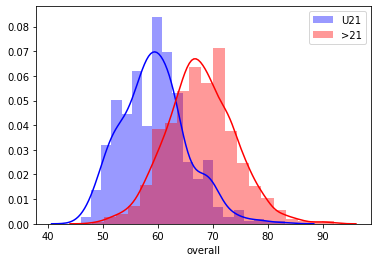

In [33]:
sb.distplot(D.overall[D.age<21], bins = 20, color = 'b')
sb.distplot(D.overall[D.age>=21], bins = 20, color = 'r')
plt.legend(('U21', '>21'))


Selection correct : 2pts 
Figure 1pt. 
Figure 3. Distributions of overal score for two age groups (under 21 and older 21). (1pt)

Distribution is symmetric, unimodal, and fairly normal 
Mean is lower for U21 (2pt)
Variability is lower for U21 (1pt)
Shape is lower for U21 (1pt)


### Question 2.2 (13pt)
Determine the *mean* overall ability of the U21 players only. First, report the number of players under 21 years of age. Using a bootstrap, determine 90% confidence interval for the mean of the U21 players. What does this interval mean? 

In [9]:
def bootstrap(data, fcn, numIter = 1000):
    it = 0 ## setting the iteration variable to zero. It will be increased each time a loop is executed
    stats = np.array(range(numIter), dtype = 'float64') ## initializing the stats array (the function output)
    N = data.shape[0]
    while it < numIter:
        sample = np.random.choice(data, size = N, replace = True) ## Generates a random sample from a given 1-D array 
        stats[it] = fcn(sample)  
        it = it + 1
    return stats

def confidenceInt(data, prec):
    lp = (100 - prec)/2
    Int = [np.percentile(data, lp), np.percentile(data, 100-(lp/2))]
    return Int

def doInterval(data): 
    stats = bootstrap(data,np.mean)
    A=confidenceInt(stats,90)    
    print('the mean of distribution is %.3f\n' % np.mean(data))
    print('the 90 percent confidence interval is %.3f - %.3f' % (A[0],A[1]))
    print('Number of observations %.3f' % data.shape[0])

In [10]:
doInterval(D.overall[D.age<21])

the mean of distribution is 59.334

the 90 percent confidence interval is 58.912 - 59.829
Number of observations 560.000


>Selection (2>Bootstrap (4pts)
>Interval 5pts 
> With 90 probability, the true mean of the population that these players are samples from falls into this confidence interval! (4pts)

### Question 2.3 (7pt)
Repeat the procedure from Question 2.2 for all players below 19 years, again reporting the number of players in this category, their mean ability amd the 90% confidence interval for the mean. (2pts)

Written answer: Which interval is wider? Why do you think this is? (5pts)

In [14]:
doInterval(D.overall[D.age<19])
print(np.std(D.overall[D.age<19]))
print(np.std(D.overall[D.age<21]))

the mean of distribution is 57.288

the 90 percent confidence interval is 56.531 - 58.225
Number of observations 160.000
5.850627637271065
5.955273077153509


There are fewer player under 19 as compared to under 21. So, although the variability of overall is nearly matched in both groups, the lower number of observations makes the mean estimate more variable 

## Task 3: Acrobatic tricks and player overall ability (35pt)
The variable skill_moves contains the results of a assessment in which players need to perform acrobatic tricks with the ball (balancing a football on the head, etc...). A score of 1 indicates no special skill, 5 indicates acrobat-like performance. 
### Question 3.1 (8pt)
Make a violin plot of overall (y-variable), depending on skill_moves (x-variable). (3pts) Don't forget the figure caption. (1pt)

Written answer: Does the result from the skill_moves assessment relate to the players performance on the field (i.e., overall)?  If yes, how? (4pts) 

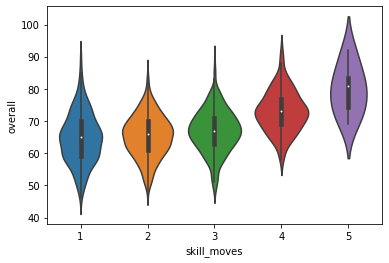

In [10]:
sb.violinplot(D.skill_moves,D.overall)

*Figure 6*. violinplots of the overall abilility dependent on the level of acrobatic skill. 

> The mean of the "overal" distribution seems to increase as the skill_move increase!

### Question 3.2: Hypotheses (6pt)
Calculate and report the difference in the mean overall ability for players that scored 4 and 5 on the skills test (4pts). Also report the number of players that scored 4 and the number of players that scored 5. (2pts)

In [44]:
# calculating the mean differences
def calcMeanDiff(df):
    a4=df.overall[df.skill_moves==4].mean()
    a5=df.overall[df.skill_moves==5].mean()
    return a5-a4

diff = calcMeanDiff(D)
print(f"The difference between overal score for skill move of 5 and 4 is {diff}")


The difference between overal score for skill move of 5 and 4 is 6.699999999999989


In [51]:
# getting the number of players with scores of 4 and 5
group_skill = D['overall'].groupby(D['skill_moves']).count()
# group_skill = D.groupby(D['skill_moves']).count()

group_skill

skill_moves
1     336
2    1583
3     934
4     140
5       7
Name: overall, dtype: int64

### Question 3.3: Randomization test (13pt)
Test the hypothesis that players that get a 5 on the skills assessment have a higher overall ability than players who get a 4 on the skills test. Formulate the corresponding Null-hypothesis. (2pts) Then perform a randomisation test to test this null-hypothesis (3pts). When doing so, restrict the analysis and the randomisation test to data that comes from people that scored either 4 or 5 (2pts). Conduct a one- or two-sided test (as appropriate for the hypothesis). (choice: 1pt, execution:2pts)  Report the p-value (1pt). What can you conclude? (2pts)

 P-value of the randomisation test is p=  0.086


/home/ladan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater_equal


0.086

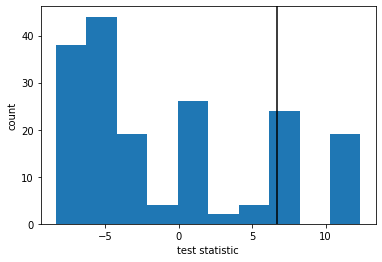

In [52]:
def calcMeanDiff(D):
    a4=D.overall[D.skill_moves==4].mean()
    a5=D.overall[D.skill_moves==5].mean()
    return a5-a4
    
def performRandomization(D,fcn,shuffle,numIterations=500,sides=1, nbins = 10):    
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data 
        S=D.copy()                    # Make copy of the data frame
        x = np.array(range(len(D.index))) # Make copy of the data frame
        np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself! 
        y = S[shuffle].iloc[x]   # copy the newly reorded values into a new Series  
        y = y.reset_index(drop=True)   #reoder the indices 
        S[shuffle]=y           # Copy back into the data frame
        
        #2. Calculate test statistics 
        listOfTS[i] = fcn(S)

    # 3. Caluclate the real test statistic 
    realTS = fcn(D)
      
    # 4. Plot a histogram of the 
    plt.hist(listOfTS,bins= nbins)
    plt.xlabel('test statistic')
    plt.ylabel('count')
    plt.axvline(x=realTS, color='k')
    
    # 5. determine p-value (one sided)
    if sides==1: 
        p=sum(listOfTS>=realTS)/len(listOfTS)
        print(' P-value of the randomisation test is p= ',p)
    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=realTS)/len(listOfTS)
        print(' P-value of the randomisation test is p= ',p)
    return p

A=D[(D.skill_moves>3)]
calcMeanDiff(A)
performRandomization(A,calcMeanDiff,'skill_moves',sides=1)

*Figure 7*. histogram showing the distribution of the differences in mean ability of players with skill_moves 4 and 5 under the null hypothesis. 

> Based on the evidence, we cannot reject the null-hypothesis that the overall ability of the players with acrobatic skill level 4 and 5 does not differ.  

### Question 3.4: Interpretation (8pt)

A professional coaching agency conducts a statistical test that shows that players with a skill_moves assessment of 4 or 5 have significantly better overall ability than players with skill_moves scores of 1-3. They are now using this result to sell acrobatic training camps to football clubs, claiming that "better acrobatic skills with the ball make players better on the field". 

What is the main problem with this claim? What evidence would the agency need to show to address this possible concern? Answer this question in 2-3 sentences.  

> The main problem is that the agency is making a causal claim (3pts), ignoring all the other covariates that could be affecting the overal score (1pt)! To make a causal claim, the agency needs to conduct an experimental study, randomly assign players to the experimental and control group. (4pts) 
> 1pts for other solutions - matching / blocking.